In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
# fix seed for reproducibility
np.random.seed(seed=12345)

In [2]:
# load (download if needed) the MNIST dataset
file = open('data.pkl','rb')
display_data=pickle.load(file)
x_data=display_data["image"]
y_data=display_data["label"]

In [3]:
new_y =[]
# tokenize the labels
for i in y_data:
    if(i == '-Fire-Smoke'):
        new_y.append(0)
    elif (i == '-Fire+Smoke'):
        new_y.append(1)
    elif (i == '+Fire+Smoke'):
        new_y.append(2)

In [4]:
# split the data into training dataset and validation dataset
from sklearn.model_selection import train_test_split
seed =12345
XTrain, XTest, yTrain, yTest = train_test_split(x_data,new_y,test_size=0.20,random_state=seed)
XTrain = (XTrain-np.min(XTrain))/(np.max(XTrain)-np.min(XTrain))
XTest = (XTest-np.min(XTest))/(np.max(XTest)-np.min(XTest))
valid_data = []
valid_data.append(XTest)
class_names = np.unique(yTrain)

In [5]:
#one hot encoding of the targets
from keras.utils import np_utils
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)
valid_data.append(yTest)

Using TensorFlow backend.


Freeze the last 3 layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 18, 512)        14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 57,248,579
Trainable params: 47,253,507
Non-trainable params: 9,995,072
_______________________________

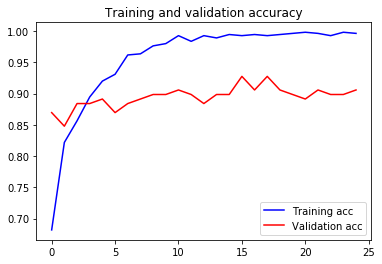

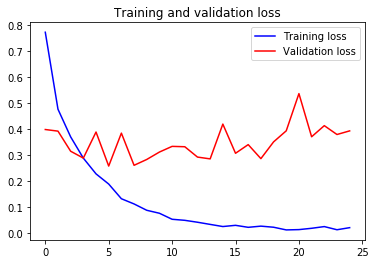

In [6]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(300, 600, 3))


    
# Freeze the last 3 layers
print("Freeze the last 3 layers")
for layer in vgg_conv.layers[:-3]:
    layer.trainable = False

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5,decay=1e-7),
              metrics=['acc'])
# Train the model

history=model.fit(XTrain, yTrain, epochs=25, batch_size=25,validation_data=valid_data)

print(history.history.keys())
# Save the model
fileName="FP_002_Freeze_3_layers.h5"
model.save(fileName)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()